# Quiz: SQL Query

Congratulations on completing the SQL Query course! We will conduct an assessment quiz to test your competensces about the material that you have learned in the course. The quiz is expected to be taken in the classroom, please contact our teaching team if you missed the chance to take it in class.

## Database Schema

In this quiz, the database used is `chinook.db` which is in the `data_input` folder.

The `chinook.db` database consists of 11 tables containing sample data from digital media stores:

- Media related data such as `tracks`, `albums`, `artists`, `genres`, `media_types`, `playlists`, `playlist_track` tables are original data from the *Apple iTunes library*.
- Information about `customers` and `employees` is generated using fictitious names and addresses found on *Google Maps*, and other well-formatted data (phone, fax, email, etc.).
- Sales information `invoices` and `invoice_items` are generated automatically using random data for the period 2009-2013. 

In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("data_input/chinook.db")

![](assets/chinookschema2.png)

## Customer Invoice Data

In this case, we want to develop a simple sales visualization report of our top 5 key markets (`Country` column in `customers`) ranked by Sales (`Total` column in `invoices`). 

We also want to identify our top 5 customers by name (`FirstName`, `LastName`) in the report.

Last but not least, we want the report to include a day-of-week analysis on sales performance, and for that we will need the `InvoiceDate` column. 



### SQL Query

Let's try by first constructing a DataFrame using the `read_sql_query()` method that we've grown familiar to, you want to know the respective total made by each customers. To find out the customers name, you need to combine the customer's first name (`FirstName`) and last name (`LastName`) and save them into a new column with the name `CustomerName`. Create an aggregation table that shows **sum** of total sales (`Total`) for each customer and sort them to get the largest to smallest respective total information. 

```
customer_total = pd.read_sql_query(
    '''
    SELECT SUM(___.____) as Total, 
    customers.___ || ' ' || customers.___ AS CustomerName  
    FROM customers
    LEFT JOIN ___
    ON customers.___ = ___.___
    GROUP BY ____
    ORDER BY ___ DESC
    LIMIT ___ 
    ''' ,conn)
```


1. Which of the following customers are among the top 5 customers ranked by their respective total (`Total`)?

    *Manakah di antara pelanggan berikut yang termasuk dalam 5 besar pelanggan yang diurutkan berdasarkan total pembeliannya (`Total`)?*
    - [ ] Victor Stevens
    - [X] Hugh O'Reilly
    - [ ] Puja Srivastava
    - [ ] Astrid Gruber	

In [5]:
## Your code here
customer_total = pd.read_sql_query(
    '''
    SELECT SUM(invoices.Total) as Total, 
    customers.FirstName || ' ' || customers.LastName AS CustomerName  
    FROM customers
    LEFT JOIN invoices
    ON customers.CustomerId = invoices.CustomerId
    GROUP BY CustomerName
    ORDER BY Total DESC 
    ''' ,conn)

In [7]:
customer_total.head(5)

,Total,CustomerName
0,49.62,Helena Holý
1,47.62,Richard Cunningham
2,46.62,Luis Rojas
3,45.62,Ladislav Kovács
4,45.62,Hugh O'Reilly


You want to find out the gross income earned by each country. Fetch the data to get **sum** of the gross income (`Total`) earned by each country and sort them to get information on the country with the highest to the lowest income. 

```
country_total = pd.read_sql_query(
    '''
    SELECT SUM(____.____) as Total, customers._____  
    FROM customers
    LEFT JOIN _____
    ON customers.____ = ____.____
    GROUP BY ____
    ORDER BY ____ DESC
    ''' ,conn)
```

2. Which of the following countries are among the top 5 grossing ranked by their respective total (`Total`)?

    *Manakah di antara negara berikut yang termasuk dalam 5 negara dengan pendapatan bruto paling besar yang diurutkan berdasarkan kolom `Total`?*
    - [ ] United Kingdom
    - [X] Germany
    - [ ] Portugal
    - [ ] India

In [9]:
## Your code here

country_total = pd.read_sql_query(
    '''
    SELECT SUM(invoices.Total) as Total, customers.Country  
    FROM customers
    LEFT JOIN invoices
    ON customers.CustomerId = invoices.CustomerId
    GROUP BY Country
    ORDER BY Total DESC
    ''' ,conn)

In [11]:
country_total.head()

,Total,Country
0,523.06,USA
1,303.96,Canada
2,195.10,France
3,190.10,Brazil
4,156.48,Germany


## Top 5 Country

Based on the information you have obtained about the 5 countries with the highest respective total, you want to do further analysis of some other information that can be used as *insight*. Use the code block below as a reference to create a DataFrame containing records where the customers are from one of the top 5 countries. 

```
top5data = pd.read_sql_query(
    '''
    SELECT ___.Total, ___.InvoiceDate, customers.country, 
    customers.____ || ' ' || customers.____ as CustomerName
    FROM customers
    LEFT JOIN ____
    ON customers.____ = ____.____
    WHERE ____.____ IN ('___' , '___', '___', '___','___')
    ''' ,conn,parse_dates='InvoiceDate')
```

>  **Hint**: In `read_sql_query()`, you can use the `parse_dates='InvoiceDate'` argument to have the specified column parsed as date, saving you from a `to_datetime()` conversion

In [13]:
## Your code here
top5data = pd.read_sql_query(
    '''
    SELECT invoices.Total, invoices.InvoiceDate, customers.Country, 
    customers.FirstName || ' ' || customers.LastName as CustomerName
    FROM customers
    LEFT JOIN invoices
    ON customers.CustomerId = invoices.CustomerId
    WHERE customers.Country IN ('USA' , 'Canada', 'France', 'Brazil','Germany')
    ''' ,conn,parse_dates='InvoiceDate')

In [22]:
top5data

,Total,InvoiceDate,Country,CustomerName
0,3.98,2010-03-11,Brazil,Luís Gonçalves
1,3.96,2010-06-13,Brazil,Luís Gonçalves
2,5.94,2010-09-15,Brazil,Luís Gonçalves
3,0.99,2011-05-06,Brazil,Luís Gonçalves
4,1.98,2012-10-27,Brazil,Luís Gonçalves
...,...,...,...,...
240,5.94,2010-07-15,France,Isabelle Mercier
241,0.99,2011-03-05,France,Isabelle Mercier
242,1.98,2012-08-26,France,Isabelle Mercier
243,16.86,2012-10-06,France,Isabelle Mercier


Using the `top5data` data frame above, perform a descriptive analysis to answer the questions below. 

3. How many sales transactions (or records, or rows) were from the top 5 countries?

    *Berapa banyak transaksi penjualan (baris) yang berasal dari 5 negara teratas?*
    - [ ] 7
    - [X] 245
    - [ ] 412
    - [ ] 1715

In [ ]:
## Your code here


### Combining SQL Query and Pandas Data Manipulation

With pandas, we can use pandas data manipulation technique such as datetime data extraction with dataframe fetched from database. For example, you are interested to know more about the sales made in the top 5 countries, especially **France**. France makes sales every day, do data aggregation to get **sum** of daily income. 

We can use `InvoiceDate` column from the `top5data` to create new column named `InvoiceDOW` to show the day name of the transaction.

> **Hint** : `pandas` has a built in method to extract day name of the week. We already learned the function in previous materials (**Working with Datetime**). Here is the example:
>
> `data['InvoiceDOW'] = data['InvoiceDate'].dt.day_name()`

In [24]:
## Your code here
top5data['InvoiceDOW'] = top5data['InvoiceDate'].dt.day_name()

In [29]:
top5data

,Total,InvoiceDate,Country,CustomerName,InvoiceDOW
0,3.98,2010-03-11,Brazil,Luís Gonçalves,Thursday
1,3.96,2010-06-13,Brazil,Luís Gonçalves,Sunday
2,5.94,2010-09-15,Brazil,Luís Gonçalves,Wednesday
3,0.99,2011-05-06,Brazil,Luís Gonçalves,Friday
4,1.98,2012-10-27,Brazil,Luís Gonçalves,Saturday
...,...,...,...,...,...
240,5.94,2010-07-15,France,Isabelle Mercier,Thursday
241,0.99,2011-03-05,France,Isabelle Mercier,Saturday
242,1.98,2012-08-26,France,Isabelle Mercier,Sunday
243,16.86,2012-10-06,France,Isabelle Mercier,Saturday


Besides France, you are also interested in analyzing the daily income obtained over the top 5 countries with the highest income. Using the `top5data` data frame, perform the aggregation to find out the **sum** of each day's sales (`Total`) for the entire country. 

4. Based on the data aggregation you have made before, answer the next two questions: How much sales (`Total`) did we make in total (`sum`) from the France market on a Tuesday? How much sales did we make in total from all the top 5 markets combined on a Friday?

    *Berdasarkan agregasi data yang Anda lakukan diatas, jawablah 2 pertanyaan berikut: Berapa jumlah penjualan (`Total`) yang kita hasilkan dari total(`sum`) pasar Perancis pada hari Selasa? Berapa total penjualan yang kita hasilkan dari semua gabungan 5 pasar teratas pada hari Jumat?*
    - [ ] 160.41 / 173.31  
    - [ ] 160.41 / 326.77
    - [X] 1.98 / 173.31
    - [ ] 1.98 / 326.77

In [33]:
## Your code here
top5data[top5data['Country']=='France'].pivot_table(
    index='InvoiceDOW',
    values='Total',
    aggfunc='sum'
).loc['Tuesday']

Total    1.98
Name: Tuesday, dtype: float64

In [34]:
top5data.pivot_table(
    index='InvoiceDOW',
    values='Total',
    aggfunc='sum'
).loc['Friday']

Total    173.31
Name: Friday, dtype: float64

The analysis results of the daily respective total sales of each country above will be made a visualization as material for your reporting. Save the data aggregation into a variable. Remove the margins if you were included in the earlier step to make visualization easier. Create a visualization by chaining the `.plot()` method by setting the `kind` parameter to create one of the following plot types:` line`, `bar`,` scatter` & `box`. 


5. Based on the analysis above, which one is the **LEAST** appropriate plot type(s)?

    *Berdasarkan analisa diatas, manakah jenis plot yang **PALING TIDAK SESUAI** digunakan?*
    - [ ] `line`
    - [ ] `bar`
    - [X] `scatter`
    - [ ] `box`

<AxesSubplot:xlabel='Country'>

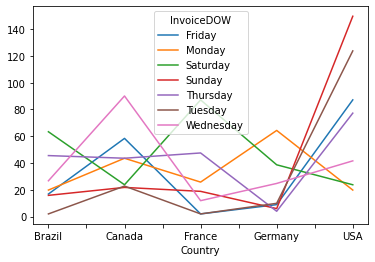

In [54]:
## Your code here
top5data.pivot_table(
    index='Country',
    columns='InvoiceDOW',
    values='Total',
    aggfunc='sum'
).plot(kind='line')

In [62]:
top5data.pivot_table(
    index='Country',
    columns='InvoiceDOW',
    values='Total',
    aggfunc='sum'
)

InvoiceDOW,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Country,,,,,,,
Brazil,16.83,19.80,63.36,15.84,45.56,1.98,26.73
Canada,58.41,43.56,23.76,21.78,43.58,22.78,90.09
France,1.98,25.75,87.15,18.84,47.52,1.98,11.88
Germany,8.91,64.35,38.67,5.94,3.96,9.90,24.75
USA,87.18,19.80,23.76,149.66,77.27,123.77,41.62


<AxesSubplot:xlabel='Country'>

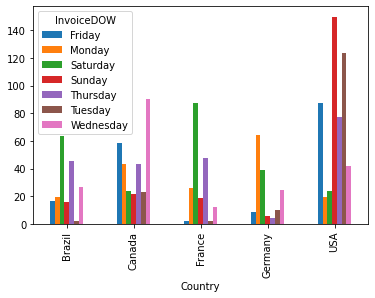

In [48]:
top5data.pivot_table(
    index='Country',
    columns='InvoiceDOW',
    values='Total',
    aggfunc='sum'
).plot(kind='bar')

<AxesSubplot:>

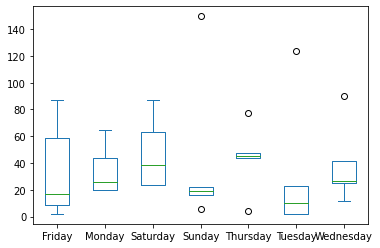

In [50]:
top5data.pivot_table(
    index='Country',
    columns='InvoiceDOW',
    values='Total',
    aggfunc='sum'
).plot(kind='box')

Suppose we want to compare the best-selling music genres in the top 5 countries. Let's try by first filling in the blanks (______) in the query below:
```
genre = pd.read_sql_query(
    '''
    SELECT 
    BillingCountry AS Country, ______.Name AS Genre 
    FROM ______ 
    LEFT JOIN invoice_items ON invoices.______ = invoice_items.______
    LEFT JOIN tracks ON invoice_items.______ = ______.______ 
    LEFT JOIN ______ ON tracks.______ = genres.______
    WHERE BillingCountry IN ('USA', 'Canada', 'France', 'Brazil', 'Germany')
    ''',conn)
```


In [64]:
## Your code here
genre = pd.read_sql_query(
    '''
    SELECT 
    BillingCountry AS Country, genres.Name AS Genre 
    FROM invoices 
    LEFT JOIN invoice_items ON invoices.InvoiceId = invoice_items.InvoiceId
    LEFT JOIN tracks ON invoice_items.TrackId = tracks.TrackId 
    LEFT JOIN genres ON tracks.GenreId = genres.GenreId
    WHERE BillingCountry IN ('USA', 'Canada', 'France', 'Brazil', 'Germany')
    ''',conn)

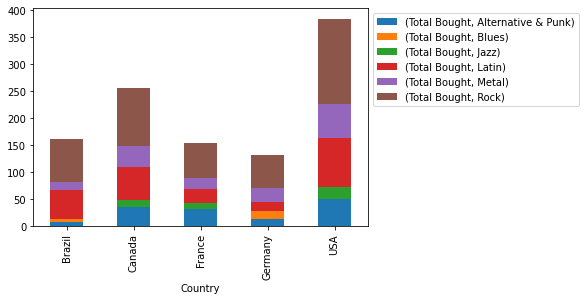

In [72]:
genre.\
groupby(['Country','Genre']).size().reset_index(name = 'Total Bought').\
sort_values(['Country','Total Bought'], ascending=False).\
groupby('Country').head(5).\
pivot(index = 'Country', columns = 'Genre').plot(kind='bar',stacked=True).\
legend(bbox_to_anchor=(1, 1), loc=2) 

Once you've completed the query for `genre` data frame above, copy and run the code below to create a bar chart that compares the best-selling song genres per country.
```
genre.\
groupby(['Country','Genre']).size().reset_index(name = 'Total Bought').\
sort_values(['Country','Total Bought'], ascending=False).\
groupby('Country').head(5).\
pivot(index = 'Country', columns = 'Genre').plot(kind='bar',stacked=True).\
legend(bbox_to_anchor=(1, 1), loc=2) 
```

6. What genre is **not** among the top-selling genre in Germany?

    *Genre apa yang **TIDAK** termasuk dalam genre terlaris di Jerman?*
   - [ ] Blues
   - [X] Jazz
   - [ ] Alternative & Punk
   - [ ] Latin

In [ ]:
## Your code here
